
# Support Vector Machines Project 


## The Data
For this series of project, we will be using the famous [Iris flower data set]


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
iris=sns.load_dataset('iris')

## Exploratory Data Analysis

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


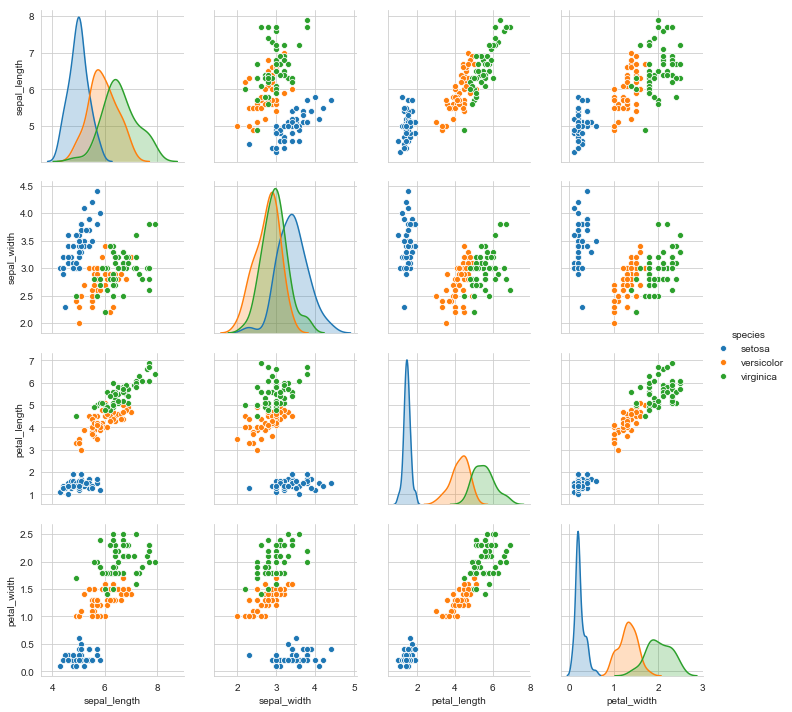

In [5]:
sns.set_style('whitegrid')
sns.pairplot(iris, hue='species')

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

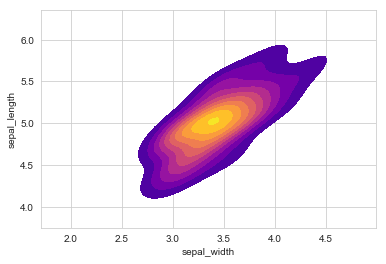

In [6]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

In [9]:
from sklearn.svm import SVC

In [10]:
model = SVC()

In [11]:
model.fit(X_train,y_train)

c:\users\mehmet\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model Evaluation

In [12]:
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.92      0.92      0.92        12
   virginica       0.94      0.94      0.94        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Gridsearch

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

c:\users\mehmet\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9722222222222222, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8055555555555556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8529411764705882, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9444444444444444, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9714285714285714, total=   0.0s
[CV] C=1000, gamma=1, kernel=rb

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
c:\users\mehmet\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [19]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [20]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


In [21]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.92      0.92      0.92        12
   virginica       0.94      0.94      0.94        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

